In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot

In [2]:
q1 = pd.read_csv('q1.csv')

In [3]:
len(q1.columns)

15

In [4]:
# change column names for better management
q1.columns = ['date','code', 'age', 'gender', 'self_description', 'course', 'year', 'software_testing_knowledge', 'concepts', 'programming_years', 'js', 'use_no_practice', 'use_manual', 'use_tutorial', 'use_internet']

In [5]:
# remove the years from the programming_years column
q1['programming_years'] = q1['programming_years'].str.replace('years', '')

In [6]:
# get values q1['gender]
q1['gender'].value_counts().values

array([7, 2], dtype=int64)

In [30]:
fig = px.pie(values=q1['gender'].value_counts().values, 
             names=q1['gender'].value_counts().keys(),
             title="Participants distributed by gender",
             color_discrete_sequence=['mediumpurple', '#4059ad'])

fig.update_traces(textinfo='value+percent')
fig.layout.width = 800  
fig.layout.height = 600  

iplot(fig)

In [31]:
iplot(px.pie(values=q1['age'].value_counts().values, 
       names=q1['age'].value_counts().keys(),
       title="Participants distributed by age",
       color_discrete_sequence = ['mediumpurple', '#4059ad']
      ).update_traces(textinfo='value+percent'))

In [32]:
iplot(px.pie(values=q1['course'].value_counts().values, 
       names=q1['course'].value_counts().keys(),
       title="Participants distributed by course",
       color_discrete_sequence = ['mediumpurple', '#4059ad']
      ).update_traces(textinfo='value+percent'))

In [33]:
iplot(px.pie(values=q1['year'].value_counts().values, 
       names=q1['year'].value_counts().keys(),
       title="Participants distributed by year",
       color_discrete_sequence = ['mediumpurple', '#4059ad']
      ).update_traces(textinfo='value+percent'))

In [34]:
software_testing = []
for i in q1['concepts']:
    software_testing += i.split(';')

In [35]:
software_testing_columns = set(software_testing)
software_testing_columns = list(software_testing_columns)
software_testing_columns 

['Condition/decision coverage',
 'White-box testing',
 'Unit testing',
 'Decision coverage',
 'Statement coverage',
 'Path coverage',
 'Modified condition/decision coverage',
 'Mutation testing',
 'Black-box testing']

In [36]:
software_testing_dict = {}
for i in software_testing_columns:
    # count the number of times the concept appears in the list
    software_testing_dict[i] = software_testing.count(i)
        

In [39]:
# turn dict into a dataframe
software_testing_df = pd.DataFrame(software_testing_dict.items(), columns=['Concept', 'Count'])
# sort the dataframe by count
software_testing_df = software_testing_df.sort_values(by='Count', ascending=False)
print(software_testing_df)

                                Concept  Count
2                          Unit testing      9
7                      Mutation testing      9
1                     White-box testing      8
8                     Black-box testing      8
4                    Statement coverage      7
0           Condition/decision coverage      3
3                     Decision coverage      3
5                         Path coverage      3
6  Modified condition/decision coverage      1


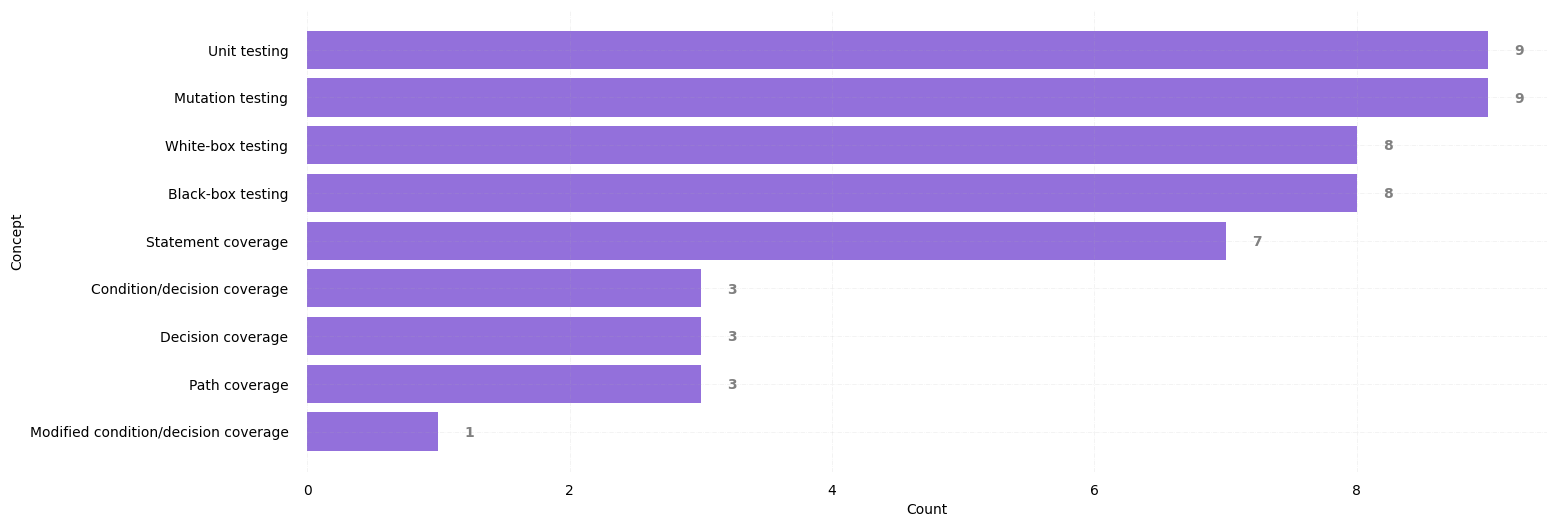

In [38]:
concepts = software_testing_df['Concept']
count = software_testing_df['Count']

fig, ax = plt.subplots(figsize=(16, 6))

# Horizontal Bar Plot
ax.barh(concepts, count, color='mediumpurple')

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x, y gridlines
ax.xaxis.grid(True, linestyle='-.', linewidth=0.5, alpha=0.2)
ax.yaxis.grid(True, linestyle='-.', linewidth=0.5, alpha=0.2)

# Show top values 
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width() + 0.2, i.get_y() + 0.5, 
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='grey')
    
# Add axis labels
ax.set_xlabel('Count')
ax.set_ylabel('Concept')

# Add Plot Title
# ax.set_title('Which Software Testing Concepts were known by the Participants?', loc='left')

# Show Plot
plt.show()


Text(0, 0.5, 'Count')

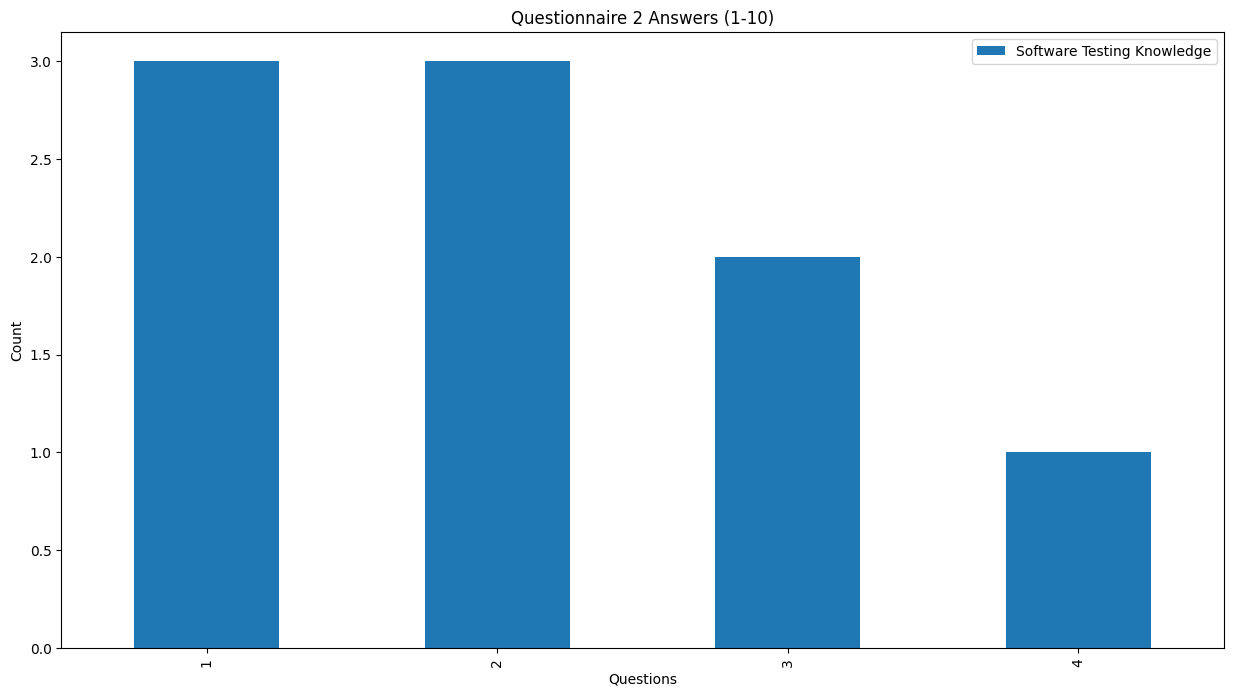

In [45]:
st_knowledge = q1['software_testing_knowledge'].value_counts()

data = pd.DataFrame({
    "Software Testing Knowledge": st_knowledge.values},
    index = [str(i) for i in range(1, 5)]
)

data.plot(kind="bar",figsize=(15, 8))

plt.title("Questionnaire 2 Answers (1-10)")

plt.xlabel("Questions")

plt.ylabel("Count")